In [1]:
# -*- coding: utf-8 -*-
#import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from DynamicLoop import DynamicLoop
#zhfont1 = mpl.font_manager.FontProperties(fname='C:\\Windows\\Fonts\\simsun.ttc',size=12)

In [2]:
import glob
import os
from file_sort_method import *

In [3]:
g345files = glob.glob('dl_G345/datas/0.1hz/*.csv')
g345files.sort(key=force_of_file)
g375files = glob.glob('dl_G375/datas/0.1hz/*.csv')
g375files.sort(key=force_of_file)
g375_1_files = glob.glob('dl_G375_1/datas/0.1hz/*.csv')
g375_1_files.sort(key=force_of_file)

In [43]:
def mdr_gen(files):
    data_dict = {}
    plt.figure(figsize=(12,15))
    for p in range(1,6):
        sigma_m = [0]
        epsilon_m = [0]
        sigma_m_byfit = [0]
        epsilon_m_byfit = [0]
        modulus = [0]
        damping_ratio = [0]
        modulus_byfit = [0]
        damping_ratio_byfit = [0]
        for f in files:
            df = pd.read_csv(f, encoding='gb2312')
            loop = DynamicLoop(df['epsilon_d'][p*50:p*50+50], df['sigma_d'][p*50:p*50+50])
            epsilon_m.append(loop.epsilon_m())
            sigma_m.append(loop.sigma_m())
            epsilon_m_byfit.append(loop.epsilon_m_byfit())
            sigma_m_byfit.append(loop.sigma_m_byfit())
            modulus.append(loop.modulus())
            damping_ratio.append(loop.damping_ratio())
            modulus_byfit.append(loop.modulus_byfit())
            damping_ratio_byfit.append(loop.damping_ratio_byfit())

            plt.subplot(5,2,p*2-1)
            loop.plot_to_center(plot_fit=False)
            plt.xlabel(r'$\varepsilon_d$ / $10^{-4}$', fontsize=18)
            plt.ylabel(r'$\sigma_d$ / kPa', fontsize=18)
            plt.title('@period {0}'.format(p+1))
            plt.subplot(5,2,p*2)
            loop.plot_to_center(plot_loop=False)
            plt.xlabel(r'$\varepsilon_d$ / $10^{-4}$', fontsize=18)
            plt.ylabel(r'$\sigma_d$ / kPa', fontsize=18)
            plt.title('@period {0}'.format(p+1))
            #plt.axis([-0.0008, 0.0008, -150, 150])

        tmp_dict = {(p+1, 'epsilon_m'):epsilon_m,
                    (p+1, 'sigma_m'):sigma_m,
                    (p+1, 'modulus'):modulus,
                    (p+1, 'damping_ratio'):damping_ratio,
                    (p+1, 'epsilon_m_byfit'):epsilon_m_byfit,
                    (p+1, 'sigma_m_byfit'):sigma_m_byfit,
                    (p+1, 'modulus_byfit'):modulus_byfit,
                    (p+1, 'damping_ratio_byfit'):damping_ratio_byfit}
        data_dict.update(tmp_dict)

        xm = max(epsilon_m)*1e4        # x扩大1e4
        ym = max(sigma_m)
        xylim = [-xm*1.25, xm*1.25, -ym*1.2, ym*1.2]
        
        plt.subplot(5,2,p*2-1)
        bb, = plt.plot(np.array(epsilon_m)*1e4, sigma_m, 'kx-', label='backbone curve')        # x扩大1e4
        plt.axis(xylim)
        plt.legend(loc=0, handles=[bb], fontsize=14)
        
        plt.subplot(5,2,p*2)
        bb, = plt.plot(np.array(epsilon_m_byfit)*1e4, sigma_m_byfit, 'kx-', label='backbone curve')        # x扩大1e4
        plt.axis(xylim)
        plt.legend(loc=0, handles=[bb], fontsize=14)
        
    modulus_and_damping_ratio = pd.DataFrame(data_dict)
    filedir = os.path.dirname(f)
    topath = os.path.dirname(filedir)
    modulus_and_damping_ratio.to_csv(os.path.join(topath,'modulus_and_damping_ratio.csv'), index=False)

D:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\tfrye\Desktop\珊瑚砂试验\dongli\dynamic_algs.py:41: RuntimeWarning: invalid value encountered in sqrt
  res1 = np.sqrt(up/down1)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


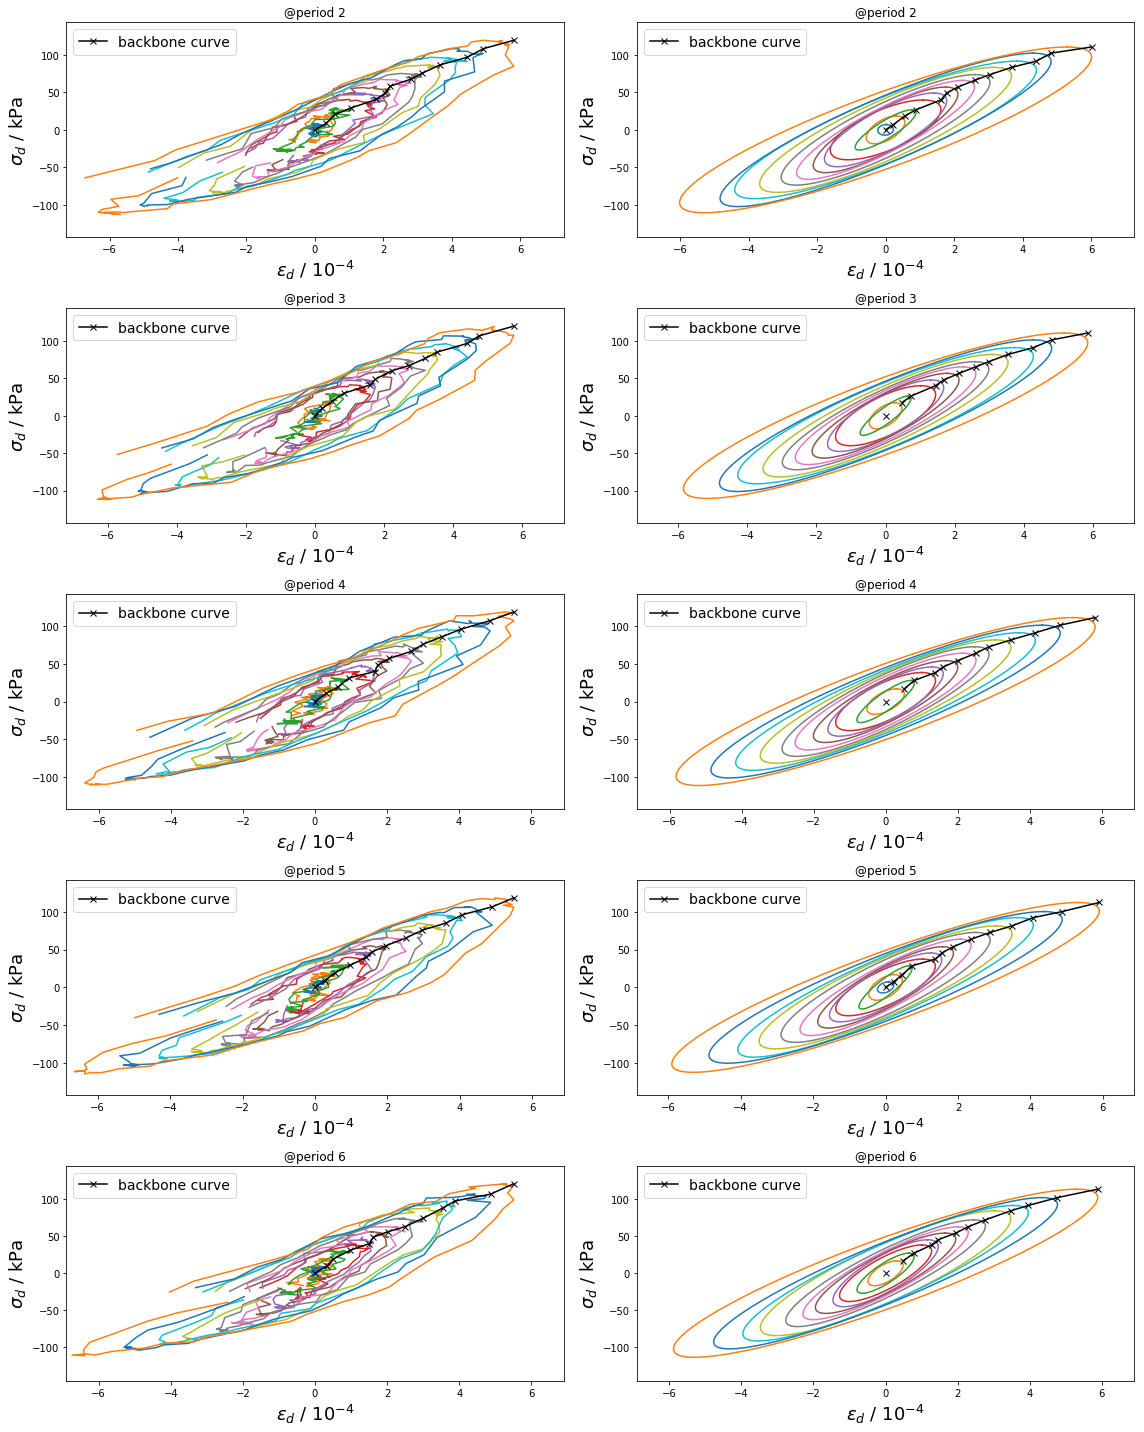

In [44]:
mdr_gen(g345files)
plt.tight_layout()
plt.savefig('figs/g345_loops.png')

D:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\tfrye\Desktop\珊瑚砂试验\dongli\dynamic_algs.py:41: RuntimeWarning: invalid value encountered in sqrt
  res1 = np.sqrt(up/down1)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\tfrye\Desktop\珊瑚砂试验\dongli\dynamic_algs.py:42: RuntimeWarning: invalid value encountered in sqrt
  res2 = np.sqrt(up/down2)


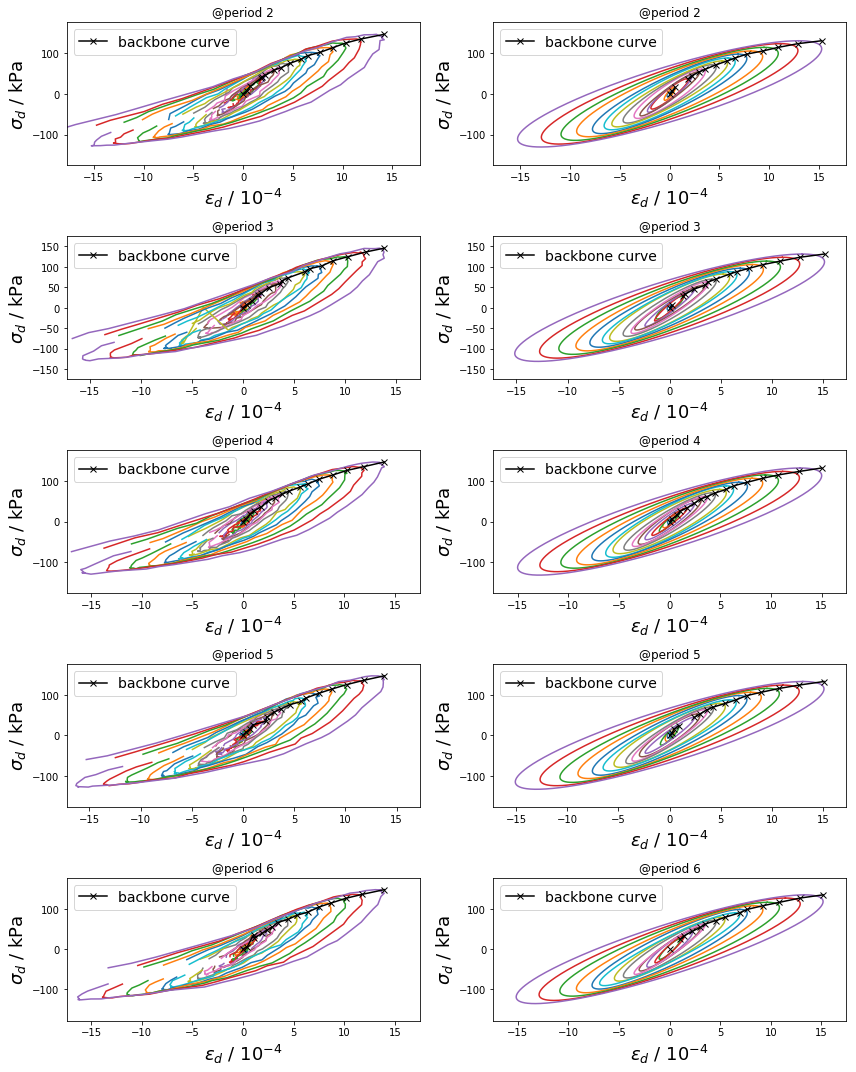

In [42]:
mdr_gen(g375files)
plt.tight_layout()
plt.savefig('figs/g375_loops.png')

In [ ]:
mdr_gen(g375_1_files)
plt.tight_layout()
plt.savefig('figs/g375_1_loops.png')

In [45]:
def mdr_plot(csvfile_path, save_path='figs/'):
    df = pd.read_csv(csvfile_path, encoding='gb2312',header=[0,1], tupleize_cols=True)
    df.columns = pd.MultiIndex.from_tuples(df.columns)
#     plt.figure(figsize=(16,20),dpi=300)
    for i, col in enumerate('23456'):
        data = df[col]

        plt.figure(figsize=(5,3))        
        plt.plot(data['epsilon_m_byfit']*1e4,data['sigma_m_byfit'],'ro-',label='byfit')
        plt.plot(data['epsilon_m']*1e4,data['sigma_m'],'bs-',label='nofit')
        plt.legend(loc=0)
        plt.ylabel(r'$\sigma_m$ /kPa', fontsize=16)
        plt.xlabel(r'$\varepsilon_m$ / $10^{-4}$', fontsize=16)
        plt.title('backbone curve @period {0}'.format(col), fontsize=12)
        plt.tight_layout(pad=0.05)
        plt.savefig('{0}backbone_curve_@period{1}.png'.format(save_path, col), bbox_inches='tight')

        plt.figure(figsize=(5,3))
        plt.plot(data['epsilon_m_byfit'][1:]*1e4, data['modulus_byfit'][1:]/1000,'ro',label='modulus byfit')
        plt.plot(data['epsilon_m'][1:]*1e4, data['modulus'][1:]/1000,'bs',label='modulus nofit')
        plt.legend(loc=0)
        plt.ylabel(r'$E_d$ /MPa', fontsize=16)
        plt.xlabel(r'$\varepsilon_m$ / $10^{-4}$', fontsize=16)
        plt.title('elastic modulus @period {0}'.format(col), fontsize=12)
        plt.tight_layout(pad=0.05)
        plt.savefig('{0}elastic_modulus_@period{1}.png'.format(save_path, col), bbox_inches='tight')

        plt.figure(figsize=(5,3))
        plt.plot(data['epsilon_m_byfit'][1:]*1e4, data['damping_ratio_byfit'][1:]*100,'ro',label='damping_ratio_byfit')
        plt.plot(data['epsilon_m'][1:]*1e4, data['damping_ratio'][1:]*100,'bs',label='damping_ratio_nofit')
        plt.legend(loc=0)
        plt.ylabel(r'$\lambda$ /%', fontsize=16)
        plt.xlabel(r'$\varepsilon_m$ / $10^{-4}$', fontsize=16)
        plt.title('damping ratio @period {0}'.format(col), fontsize=12)
        plt.tight_layout(pad=0.05)
        plt.savefig('{0}damping_ratio_@period{1}.png'.format(save_path, col), bbox_inches='tight')
    

D:\Anaconda3\lib\site-packages\pandas\io\parsers.py:813: FutureWarning: The 'tupleize_cols' argument has been deprecated and will be removed in a future version. Column tuples will then always be converted to MultiIndex.


  self.options, self.engine = self._clean_options(options, engine)


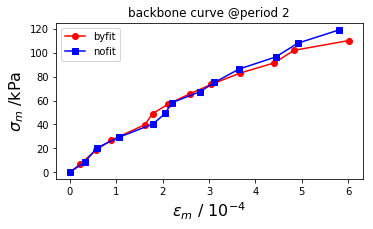

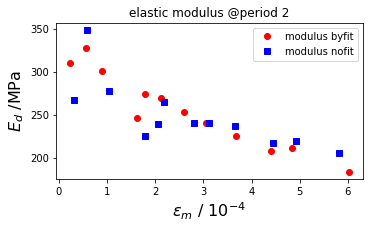

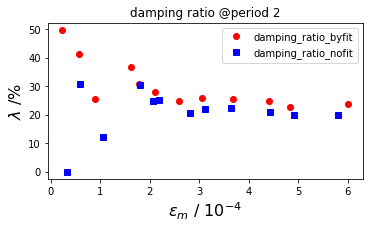

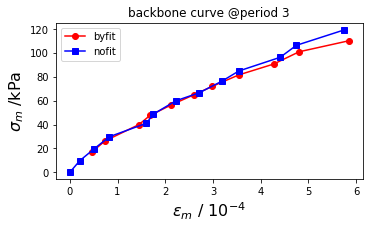

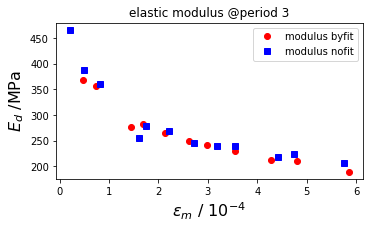

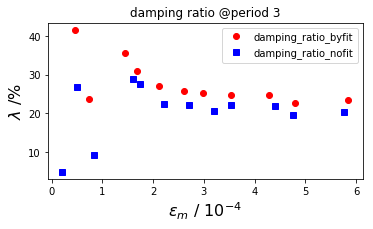

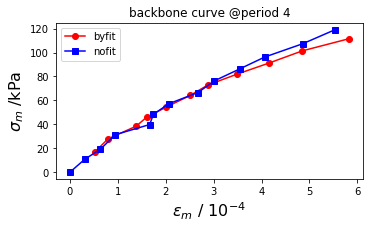

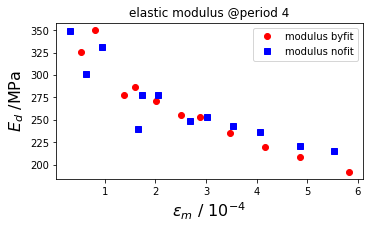

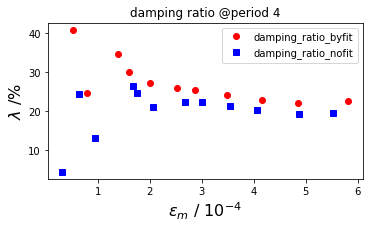

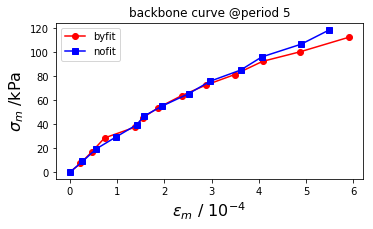

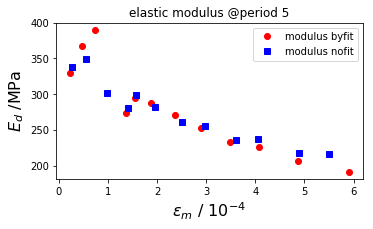

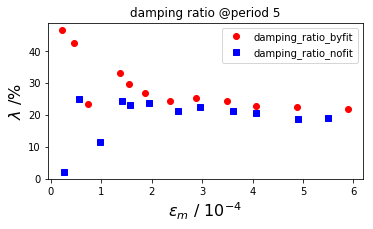

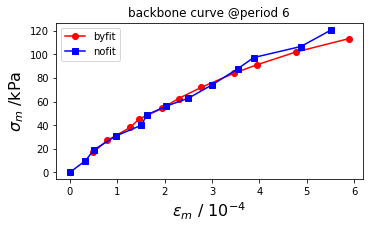

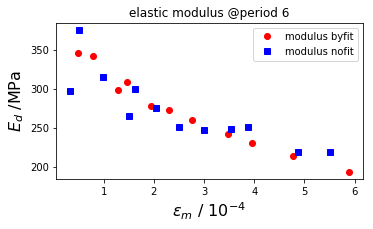

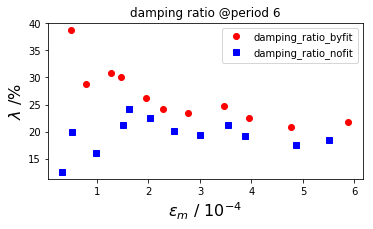

In [46]:
mdr_plot('dl_G345/datas/modulus_and_damping_ratio.csv', save_path='dl_G345/figs/')

D:\Anaconda3\lib\site-packages\pandas\io\parsers.py:813: FutureWarning: The 'tupleize_cols' argument has been deprecated and will be removed in a future version. Column tuples will then always be converted to MultiIndex.


  self.options, self.engine = self._clean_options(options, engine)


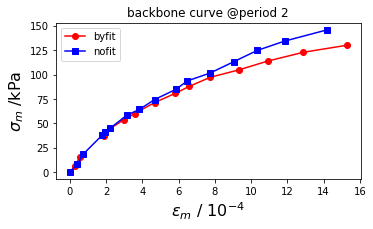

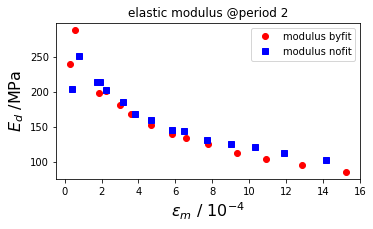

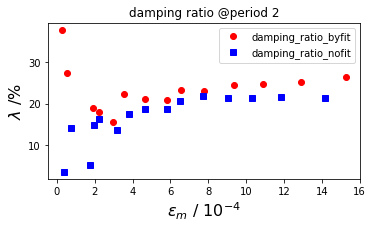

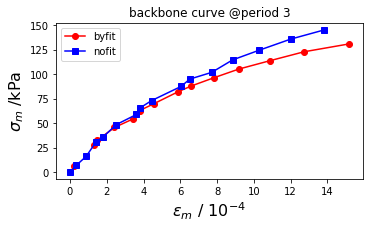

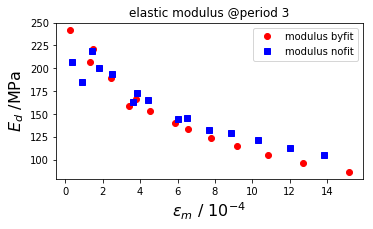

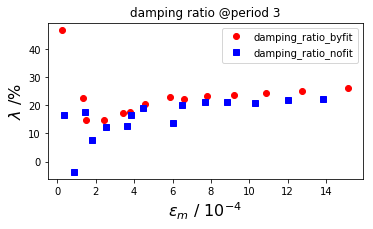

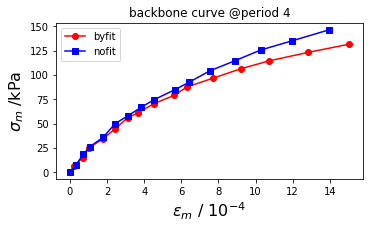

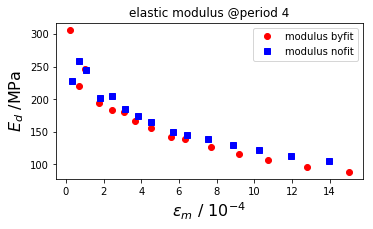

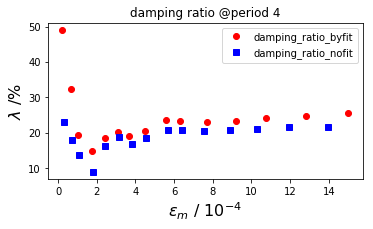

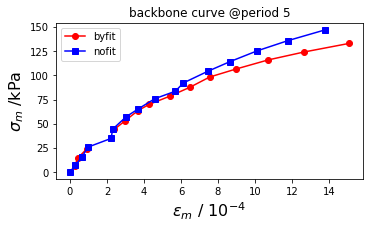

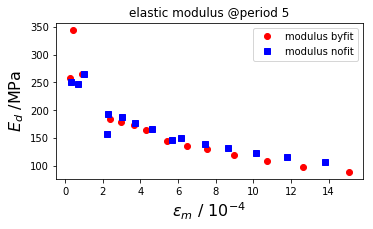

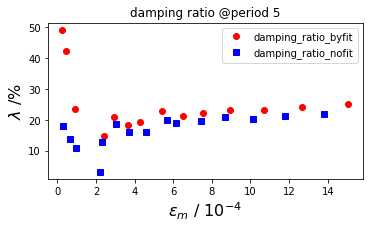

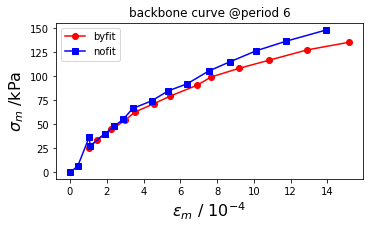

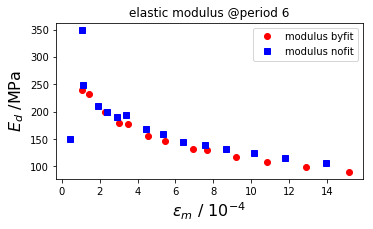

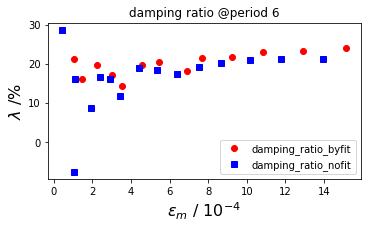

In [47]:
mdr_plot('dl_G375/datas/modulus_and_damping_ratio.csv', save_path='dl_G375/figs/')

D:\Anaconda3\lib\site-packages\pandas\io\parsers.py:813: FutureWarning: The 'tupleize_cols' argument has been deprecated and will be removed in a future version. Column tuples will then always be converted to MultiIndex.


  self.options, self.engine = self._clean_options(options, engine)


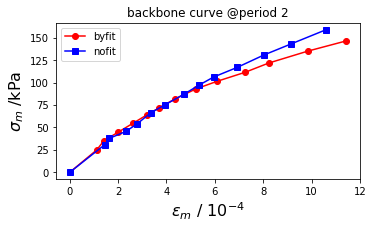

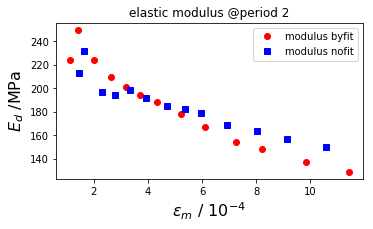

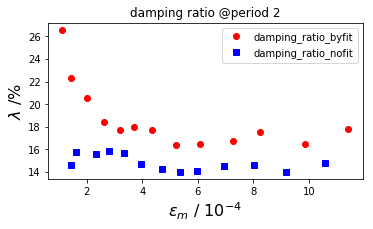

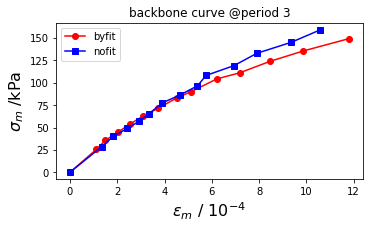

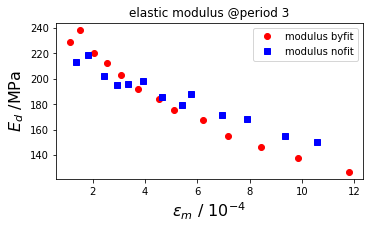

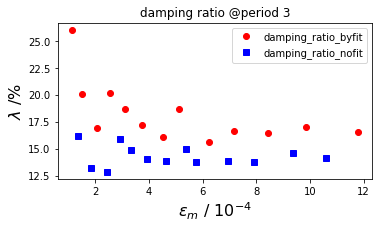

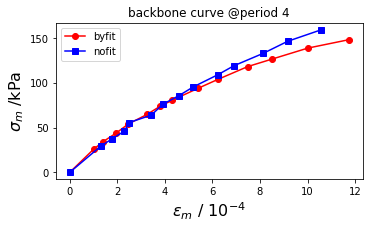

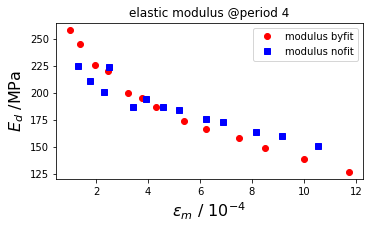

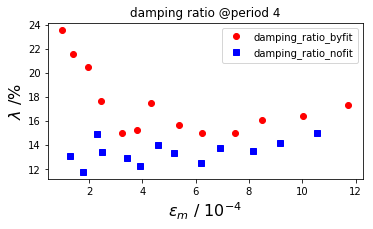

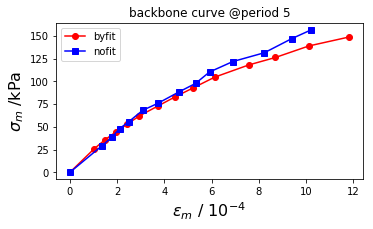

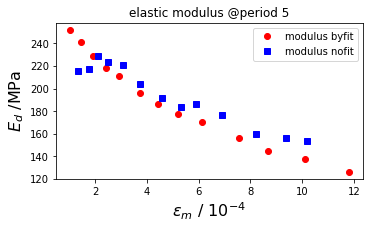

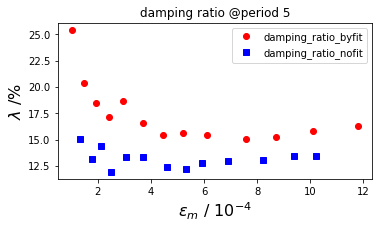

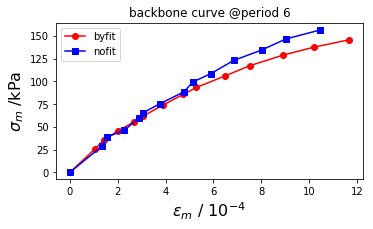

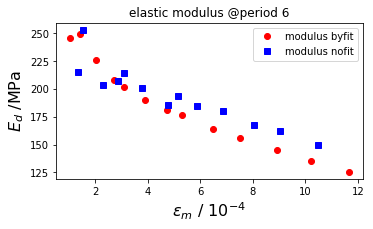

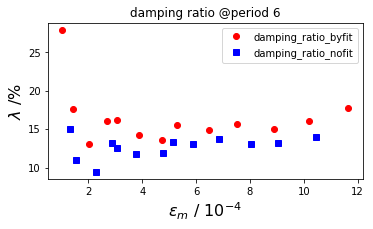

In [48]:
mdr_plot('dl_G375_1/datas/modulus_and_damping_ratio.csv', save_path='dl_G375_1/figs/')

In [34]:
def dmpr_plot(csv_path):
    df = pd.read_csv(csv_path, encoding='gb2312',header=[0,1], tupleize_cols=True)
    df.columns = pd.MultiIndex.from_tuples(df.columns)
    plt.figure(figsize=(10,3), dpi=100)
    markers = ['o','s','^','+','x','*']
    for i, col in enumerate('23456'):
        data = df[col]
        
        plt.subplot(1,2,1)
        plt.scatter(data['epsilon_m_byfit'][1:]*1e4, data['damping_ratio_byfit'][1:]*100, marker=markers[i+1],
                    label='period {0}'.format(col))
        plt.legend(loc=0)
        plt.ylabel(r'$\lambda$ /%', fontsize=14)
        plt.xlabel(r'$\varepsilon_m$ / $10^{-4}$', fontsize=14)
        plt.title('damping ratio byfit')       
        plt.subplot(1,2,2)
        plt.scatter(data['epsilon_m'][1:]*1e4, data['damping_ratio'][1:]*100, marker=markers[i+1],
                    label='period {0}'.format(col))
        plt.legend(loc=0)
        plt.ylabel(r'$\lambda$ /%', fontsize=14)
        plt.xlabel(r'$\varepsilon_m$ / $10^{-4}$', fontsize=14)        
        plt.title('damping ratio nofit')
    plt.tight_layout()


In [35]:
def ed_plot(csv_path):
    df = pd.read_csv(csv_path, encoding='gb2312',header=[0,1], tupleize_cols=True)
    df.columns = pd.MultiIndex.from_tuples(df.columns)
    plt.figure(figsize=(10,3), dpi=100)
    markers = ['o','s','^','+','x','*']
    for i, col in enumerate('23456'):
        data = df[col]
        
        plt.subplot(1,2,1)
        plt.scatter(data['epsilon_m_byfit'][1:]*1e4, data['modulus_byfit'][1:]/1000, marker=markers[i+1],
                    label='period {0}'.format(col))
        plt.legend(loc=0)
        plt.ylabel(r'$E_d$ /MPa', fontsize=14)
        plt.xlabel(r'$\varepsilon_m$ / $10^{-4}$', fontsize=14)
        plt.title('modulus byfit')       
        plt.subplot(1,2,2)
        plt.scatter(data['epsilon_m'][1:]*1e4, data['modulus'][1:]/1000, marker=markers[i+1],
                 label='period {0}'.format(col))
        plt.legend(loc=0)
        plt.ylabel(r'$E_d$ /MPa', fontsize=14)
        plt.xlabel(r'$\varepsilon_m$ / $10^{-4}$', fontsize=14)
        plt.title('modulus nofit')
    plt.tight_layout()

In [36]:
files = ['dl_G345/datas/modulus_and_damping_ratio.csv',
         'dl_G375/datas/modulus_and_damping_ratio.csv',
         'dl_G375_1/datas/modulus_and_damping_ratio.csv']   

D:\Anaconda3\lib\site-packages\pandas\io\parsers.py:813: FutureWarning: The 'tupleize_cols' argument has been deprecated and will be removed in a future version. Column tuples will then always be converted to MultiIndex.


  self.options, self.engine = self._clean_options(options, engine)
D:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


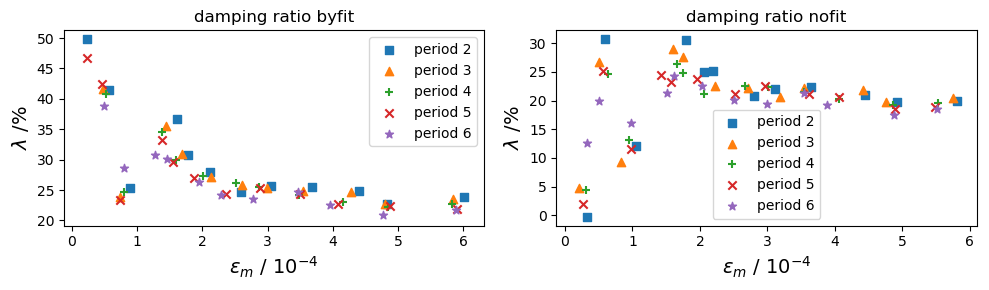

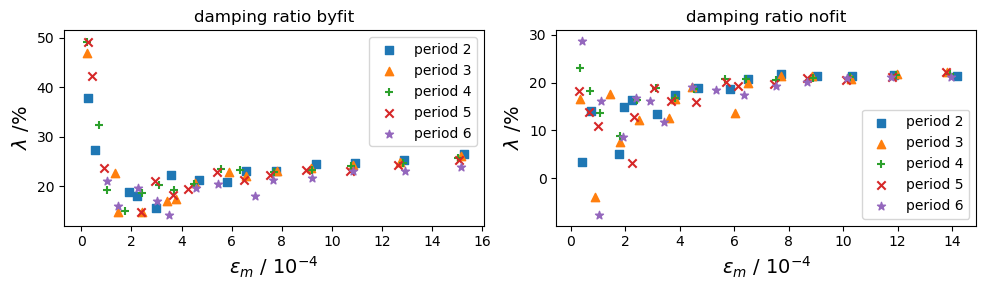

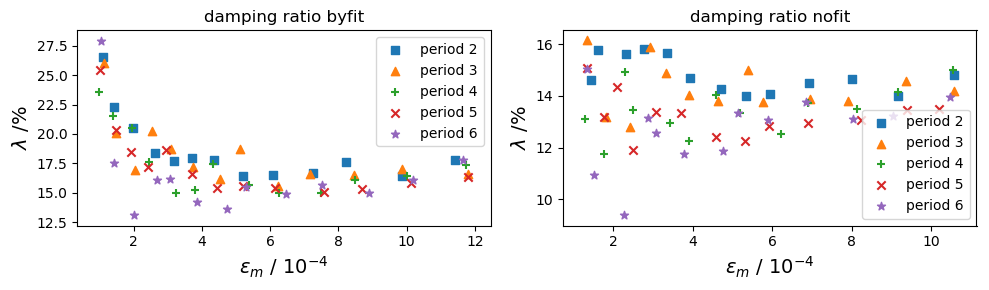

In [37]:
for f in files:
    dmpr_plot(f)
    plt.savefig(f[:-35]+'figs/damping_ratio.png')

D:\Anaconda3\lib\site-packages\pandas\io\parsers.py:813: FutureWarning: The 'tupleize_cols' argument has been deprecated and will be removed in a future version. Column tuples will then always be converted to MultiIndex.


  self.options, self.engine = self._clean_options(options, engine)
D:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


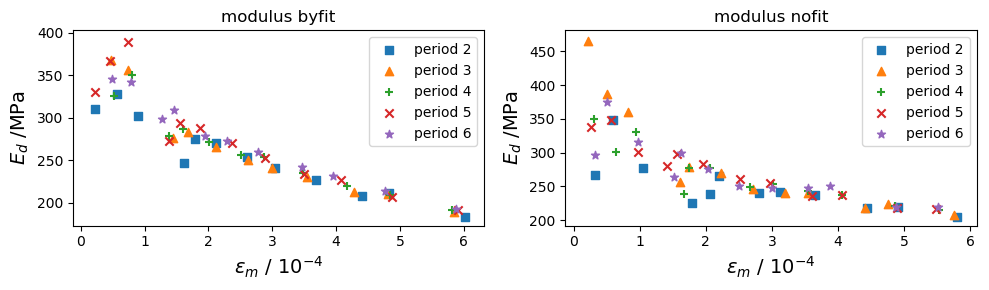

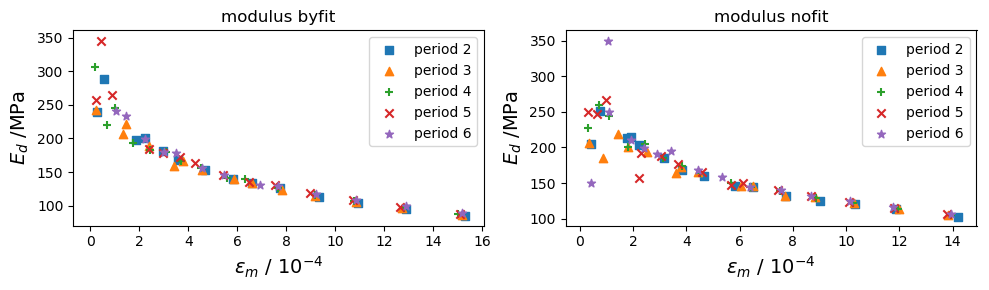

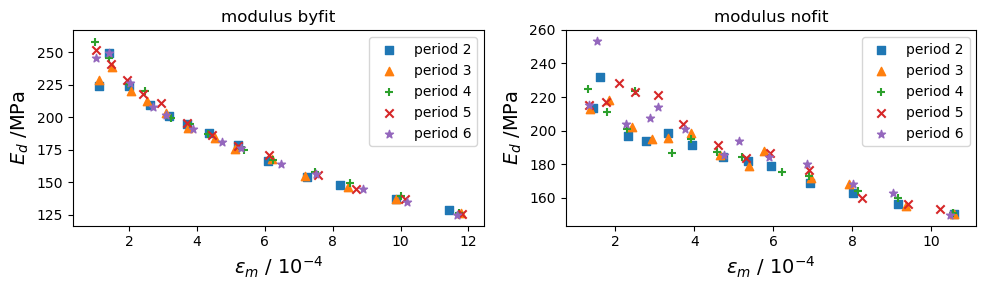

In [33]:
for f in files:
    ed_plot(f)
    plt.savefig(f[:-35]+'figs/modulus.png')

In [50]:
from scipy import stats
def edlinear_plot(csv_path):
    df = pd.read_csv(csv_path, encoding='gb2312', header=[0,1], tupleize_cols=True)
    df.columns = pd.MultiIndex.from_tuples(df.columns)
    data = pd.concat([df[col] for col in '23456'])
    data.dropna(inplace=True)  
    data = data[(data != 0).all(axis=1)]
    
    linetext = 'a={0:.2e}, b={1:.2e},\n$R^2$={2:.3f}'
    style = dict(arrowstyle='->', connectionstyle='arc3', relpos=(0., 0.))
    
    plt.figure(figsize=(10,3),dpi=100)
    x = data['epsilon_m_byfit'].values*1e4
    y = 1e3/data['modulus_byfit'].values
    b, a, r, p, std_err = stats.linregress(x, y)
    y_lr = b*x+a
    plt.subplot(1,2,1)
    plt.plot(x, y,'ko',label='byfit',)
    plt.plot(x, y_lr, 'k')
    plt.annotate(linetext.format(a,b,r*r), xy=(x[-2],y_lr[-2]), xytext=(0.5,0.1), textcoords='axes fraction', arrowprops=style)
    plt.legend(loc=0)
    plt.ylabel(r'$1/E_d$ / $MPa^{-1}$', fontsize=14)
    plt.xlabel(r'$\varepsilon_m$ / $10^{-4}$', fontsize=14)
    
    x = data['epsilon_m'].values*1e4
    y = 1000/data['modulus'].values
    b, a, r, p, std_err = stats.linregress(x, y)
    y_lr = b*x+a
    plt.subplot(1,2,2)
    plt.plot(x, y,'ks',label='nofit',)
    plt.plot(x, y_lr, 'k')
    plt.annotate(linetext.format(a,b,r*r), xy=(x[-2],y_lr[-2]), xytext=(0.5,0.1), textcoords='axes fraction', arrowprops=style)
    plt.legend(loc=0)
    plt.ylabel(r'$1/E_d$ / $MPa^{-1}$', fontsize=14)
    plt.xlabel(r'$\varepsilon_m$ / $10^{-4}$', fontsize=14)
    plt.tight_layout()


D:\Anaconda3\lib\site-packages\pandas\io\parsers.py:813: FutureWarning: The 'tupleize_cols' argument has been deprecated and will be removed in a future version. Column tuples will then always be converted to MultiIndex.


  self.options, self.engine = self._clean_options(options, engine)


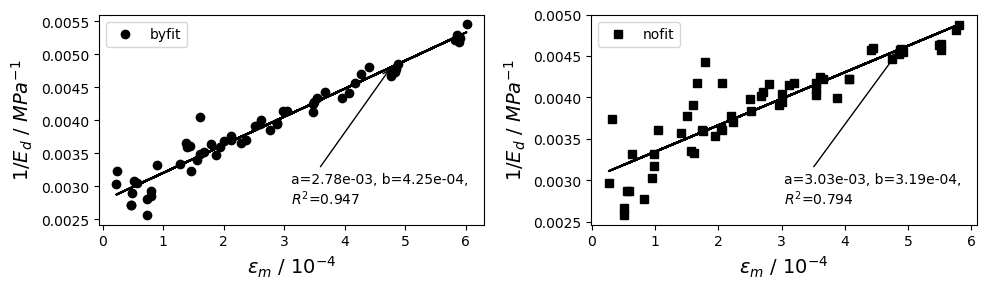

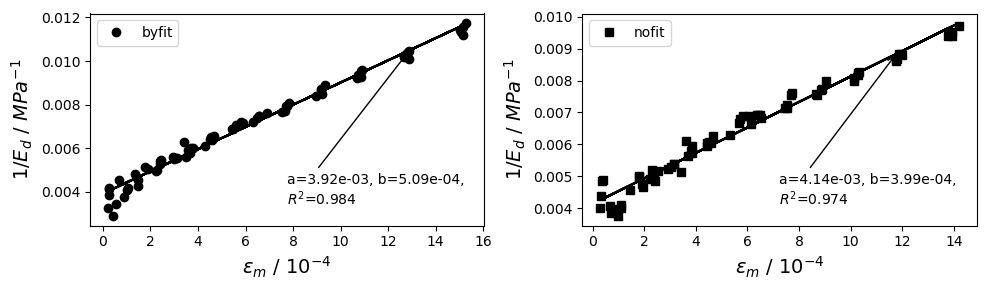

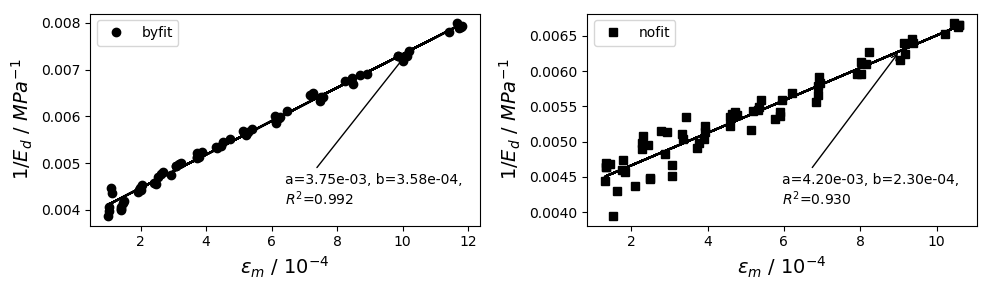

In [51]:
for f in files:
    edlinear_plot(f)
    plt.savefig(f[:-35]+'figs/moduluslinear.png')